# Capstone Project- The Battle of Neighborhoods (Week 2)

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

# Introduction: Business Problem
Opening a brand new restaurant can be quiet daunting task because of so many factors involved including the budget, location, different cuisines to serve and many others. According to the XYZ news (2019) there is an enormous rise seen in spending on restaurants by general population in California, USA. Also for entrepreneurs this means an opportunity to venture into the world of restaurant business but provided they have a right business plan. Having a right business plan is important because at the end of the day not all eateries or any business for that matter end up making profit. So equipping yourself with a plan that will make a strong foundation for your business cannot be emphasized enough. Making a decision about location, accessibility, affordability, types of cuisines to offer are just a few of the important choices that need to be considered in your plan.
Strategy here is look into the most important factors that contribute to the profitability of a restaurant. These include visibility, crime rates, parking size, surrounding business and competitor analysis. This data analysis will be looking at different data that is available such as the crime rate of different locations that will help an aspiring restaurant owner make a decision about the best location to open a restaurant in San Francisco, California. San Francisco is the 13th most populous city in the whole of United States. It is home to ethnically one of the most diverse population in US. It is best known for tourist attraction and business innovation. Walking around in the city it may be evident that the city already has huge number of restaurants. That is when gathering data, in this case from public data set and analysing it becomes all the more useful.

## 1.1 Problem
This data analysis aims in finding the best possible location in the city of San Fransisco to benefit any future restaurant owner or investors

## 1.2 Target Audience:
Decision about location in a business can have a huge impact on the costs and revenues. Investors and future business owners are often faced with market research questions such as which location would be best suited for the customers to allow them to have a fruitful business. This data analysis will provide answers to that specific question in city of San Francisco. The city is constantly attracting new businesses and food business is one of the top contenders. Due to it being the most populous cities it is important to have the knowledge about distribution of different restaurants and the types of cuisines they offer, to have a better understanding of where to open a restaurant that will be profitable.




# 2 Data Acquisition and Cleaning
## 2.1 Data Sources
To get the data for the crime rate for the city of San Francisco, police department incident report from 2018 onwards was used from the following website: https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783
To get the data for geographical coordinates for various neighborhoods in San Fransisco, following website was used: https://data.sfgov.org/Geographic-Locations-and-Boundaries/Realtor-Neighborhoods/5gzd-g9ns/data
Data for analysis of surrounding business and restaurants was extracted from FourSquare API: https://developer.foursquare.com/docs/api/venues/search
Geographical coordinates for showcasing the locations of the restaurants on the map was extracted from Geocoding API: https://developer.mapquest.com/documentation/geocoding-api/
## 2.2 Data Cleaning and Feature Selection
Data for the crime rate was downloaded as csv file and was then added in the notebook as pandas data frame by using ‘ find and add data’ in the IBM cloud.
There were numerous columns in the dataframe that were not required for our analysis purpose for our case, so they were dropped. This way the dataframe was reduced to only 5 columns containing the incident category and police district with their latitude and longitude values, which was then analyzed.
There was a lot of missing data in the dataframe which was then removed since a major chunk of data had missing values it did not make sense to fill the missing values with means of the given data. I only used data that had location information (geographical coordinates) in both the crime rate data as well as the location data provided by the San Fransico association of Realtors so that the combination of both the data gives us the meaningful information about the neighbourhoods of the city

In [1]:
# Importing all the libraries

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [2]:
from bs4 import BeautifulSoup

# 3 Methodology

 After dropping the features the DataFrame containing the incident category along with corresponding police districts was analyzed which showed Larceny theft was the major contributor to the crime (about 75000 cases), and second most common category is assault followed by burglary (I ignored other miscellaneous and malicious mischief as the frequency of these are far less than Larceny). So these are the most common crimes committed in the city.
 For the distribution of these crimes by districts Matplot lib was used for visualization of graph plotted between the police district and total number of crimes and Central district came out at the top compared to the other districts. And overall combined Central, Mission, Southern, Northern and Tenderloin contributes to the majority of the incidents in the city as per the report.

Next step was to put the each of the incident report into a geological unit, which was achieved by using the neighborhoods data defined by San Francisco Association of Realtors. The data was converted into DataFrame (df_data_5). The incident report DataFrame and neighborhood DataFrame were merged to have the geospatial data on each of the neighborhoods.
After having the crime reports on the neighborhoods, focus was on studying these neighborhoods using the Foursquare API. From the API DataFrame including the venue, venue category along with geographical coordinates was constructed.


# 4 Analysis

In [3]:
# Reading the CSV file into Pandas DataFrame

In [4]:
# The code was removed by Watson Studio for sharing.

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Longitude,point,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites)
0,2018/12/02 12:45:00 AM,2018/12/02,00:45,2018,Sunday,2018/12/02 01:56:00 AM,74374327130,743743,180908554,183360210.0,...,-122.404795,"(37.78490829943, -122.40479506276)",32.0,5.0,10.0,8.0,NaN,NaN,NaN,NaN
1,2018/12/01 08:30:00 PM,2018/12/01,20:30,2018,Saturday,2018/12/01 09:18:00 PM,74370071000,743700,180908112,183353564.0,...,-122.408036,"(37.786409612811, -122.408036237445)",19.0,6.0,3.0,36.0,NaN,NaN,1.0,NaN
2,2019/03/18 02:01:00 PM,2019/03/18,14:01,2019,Monday,2019/03/18 02:21:00 PM,78164004134,781640,190194129,190772267.0,...,-122.406699,"(37.756833733806, -122.406699002688)",53.0,3.0,2.0,20.0,3.0,NaN,NaN,NaN
3,2019/03/20 08:00:00 AM,2019/03/20,08:00,2019,Wednesday,2019/03/20 02:06:00 PM,78169706244,781697,190199583,190792201.0,...,-122.404865,"(37.78400661242, -122.404864795177)",32.0,1.0,10.0,34.0,NaN,NaN,NaN,NaN
4,2019/03/12 01:30:00 PM,2019/03/12,13:30,2019,Tuesday,2019/03/15 06:02:00 PM,78154706372,781547,196055103,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Checking the categories/columns

In [6]:
df_data_1.columns

Index(['Incident Datetime', 'Incident Date', 'Incident Time', 'Incident Year',
       'Incident Day of Week', 'Report Datetime', 'Row ID', 'Incident ID',
       'Incident Number', 'CAD Number', 'Report Type Code',
       'Report Type Description', 'Filed Online', 'Incident Code',
       'Incident Category', 'Incident Subcategory', 'Incident Description',
       'Resolution', 'Intersection', 'CNN', 'Police District',
       'Analysis Neighborhood', 'Supervisor District', 'Latitude', 'Longitude',
       'point', 'SF Find Neighborhoods', 'Current Police Districts',
       'Current Supervisor Districts', 'Analysis Neighborhoods',
       'HSOC Zones as of 2018-06-05', 'OWED Public Spaces',
       'Central Market/Tenderloin Boundary Polygon - Updated',
       'Parks Alliance CPSI (27+TL sites)'],
      dtype='object')

In [7]:
# Dropping the columns that are not required for our analysis

In [8]:
df_data_1.drop(['Incident Datetime', 'Incident Date', 'Incident Time', 'Incident Day of Week','Report Datetime', 'Row ID', 'Incident ID',
       'Incident Number', 'CAD Number', 'Report Type Code',
       'Report Type Description', 'Filed Online', 'Incident Code', 'SF Find Neighborhoods', 'Current Police Districts',
       'Current Supervisor Districts', 'Analysis Neighborhoods',
       'HSOC Zones as of 2018-06-05', 'OWED Public Spaces',
       'Central Market/Tenderloin Boundary Polygon - Updated',
       'Parks Alliance CPSI (27+TL sites)'], axis = 1, inplace = True)

In [9]:
df_data_1.head()

,Incident Year,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,point
0,2018,Other Miscellaneous,Other,"Burglary Tools, Possession Of",Cite or Arrest Adult,04TH ST \ JESSIE ST,24635000.0,Southern,Financial District/South Beach,6.0,37.784908,-122.404795,"(37.78490829943, -122.40479506276)"
1,2018,Lost Property,Lost Property,Lost Property,Open or Active,POWELL ST \ OFARRELL ST,24904000.0,Central,Tenderloin,3.0,37.786410,-122.408036,"(37.786409612811, -122.408036237445)"
2,2019,Assault,Simple Assault,Battery,Cite or Arrest Adult,22ND ST \ POTRERO AVE,23967000.0,Mission,Mission,9.0,37.756834,-122.406699,"(37.756833733806, -122.406699002688)"
3,2019,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",Open or Active,JESSIE EAST ST \ MISSION ST,35047000.0,Southern,South of Market,6.0,37.784007,-122.404865,"(37.78400661242, -122.404864795177)"
4,2019,Larceny Theft,Larceny Theft - Other,"Theft, Other Property, $50-$200",Open or Active,NaN,NaN,Central,NaN,NaN,NaN,NaN,NaN


In [10]:
df_data_1.shape

(240319, 13)

In [11]:
df_data_1.drop(['Resolution', 'Intersection', 'CNN','point'], axis = 1, inplace = True )
df_data_1.head(10)

,Incident Year,Incident Category,Incident Subcategory,Incident Description,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude
0,2018,Other Miscellaneous,Other,"Burglary Tools, Possession Of",Southern,Financial District/South Beach,6.0,37.784908,-122.404795
1,2018,Lost Property,Lost Property,Lost Property,Central,Tenderloin,3.0,37.786410,-122.408036
2,2019,Assault,Simple Assault,Battery,Mission,Mission,9.0,37.756834,-122.406699
3,2019,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",Southern,South of Market,6.0,37.784007,-122.404865
4,2019,Larceny Theft,Larceny Theft - Other,"Theft, Other Property, $50-$200",Central,NaN,NaN,NaN,NaN
5,2019,Burglary,Burglary - Other,"Burglary, Other Bldg., Forcible Entry",Out of SF,NaN,NaN,NaN,NaN
6,2019,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Motorcycle",Out of SF,NaN,NaN,NaN,NaN
7,2019,Lost Property,Lost Property,Lost Property,Northern,Marina,2.0,37.800190,-122.441177
8,2019,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Motorcycle",Out of SF,NaN,NaN,NaN,NaN
9,2019,Disorderly Conduct,Intimidation,Terrorist Threats,Ingleside,NaN,10.0,37.708311,-122.420083


In [12]:
df_data_1.drop(['Incident Subcategory', 'Incident Description', 'Analysis Neighborhood', 'Supervisor District'], axis = 1, inplace = True)
df_data_1.head()

,Incident Year,Incident Category,Police District,Latitude,Longitude
0,2018,Other Miscellaneous,Southern,37.784908,-122.404795
1,2018,Lost Property,Central,37.786410,-122.408036
2,2019,Assault,Mission,37.756834,-122.406699
3,2019,Larceny Theft,Southern,37.784007,-122.404865
4,2019,Larceny Theft,Central,NaN,NaN


In [13]:
import seaborn as sns

In [14]:
df = df_data_1
df.head()

,Incident Year,Incident Category,Police District,Latitude,Longitude
0,2018,Other Miscellaneous,Southern,37.784908,-122.404795
1,2018,Lost Property,Central,37.786410,-122.408036
2,2019,Assault,Mission,37.756834,-122.406699
3,2019,Larceny Theft,Southern,37.784007,-122.404865
4,2019,Larceny Theft,Central,NaN,NaN


In [15]:
print(df.dtypes)

Incident Year          int64
Incident Category     object
Police District       object
Latitude             float64
Longitude            float64
dtype: object


In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [17]:
df['Incident Category'] = df['Incident Category'].astype('category')

In [18]:
print(df.dtypes)

Incident Year           int64
Incident Category    category
Police District        object
Latitude              float64
Longitude             float64
dtype: object




 After dropping the features the DataFrame containing the incident category along with corresponding police districts was analyzed which showed Larceny theft was the major contributor to the crime (about 75000 cases), and second most common category is assault followed by burglary (I ignored other miscellaneous and malicious mischief as the frequency of these are far less than Larceny). So these are the most common crimes committed in the city.


In [19]:
# Plotting the number of Crimes by Categories

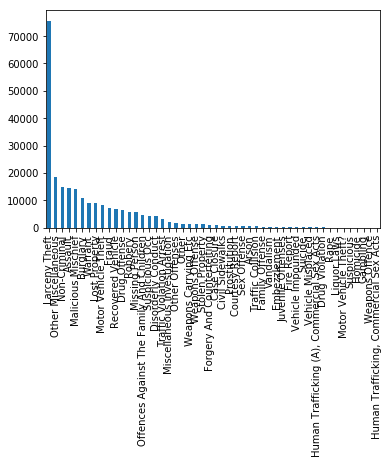

In [20]:
df['Incident Category'].value_counts().plot(kind='bar', x = 'Num of incidents', y = 'Incident category')

In [130]:

Num_of_incidents = df['Incident Category'].value_counts()

In [131]:
Num_of_incidents

Larceny Theft                                 75642
Other Miscellaneous                           18566
Non-Criminal                                  15010
Assault                                       14436
Malicious Mischief                            14038
Burglary                                      10676
Warrant                                        9103
Lost Property                                  8847
Motor Vehicle Theft                            8381
Fraud                                          7126
Recovered Vehicle                              6854
Drug Offense                                   6365
Robbery                                        5685
Missing Person                                 5650
Offences Against The Family And Children       4668
Suspicious Occ                                 4443
Disorderly Conduct                             4154
Traffic Violation Arrest                       3215
Miscellaneous Investigation                    2104
Other Offens

In [132]:
df1= df['Incident Category'].groupby(df['Police District'])

In [133]:
df1.describe()

,count,unique,top,freq
Police District,,,,
Bayview,19301,47,Larceny Theft,4200
Central,38562,49,Larceny Theft,17026
Ingleside,16846,47,Larceny Theft,3444
Mission,32573,50,Larceny Theft,8734
Northern,31008,47,Larceny Theft,13663
Out of SF,6321,39,Recovered Vehicle,1793
Park,11115,44,Larceny Theft,3265
Richmond,13487,44,Larceny Theft,5622
Southern,30579,49,Larceny Theft,9707


In [134]:
type(df1)

pandas.core.groupby.generic.SeriesGroupBy

For the distribution of these crimes by districts Matplot lib was used for visualization of graph plotted between the police district and total number of crimes and Central district came out at the top compared to the other districts. And overall combined Central, Mission, Southern, Northern and Tenderloin contributes to the majority of the incidents in the city as per the report.

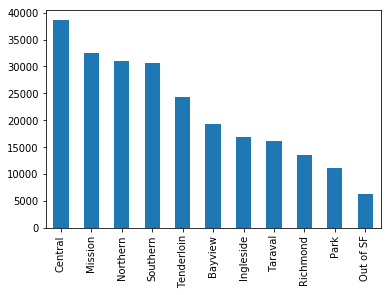

In [135]:
df['Police District'].value_counts().plot(kind='bar')

Next step was to put the each of the incident report into a geological unit, which was achieved by using the neighborhoods data defined by San Francisco Association of Realtors. The data was converted into DataFrame (df_data_5). The incident report DataFrame and neighborhood DataFrame were merged to have the geospatial data on each of the neighborhoods.

In [136]:

body = client_c201a1da7bd44604b51200f9984979ab.get_object(Bucket='machinelearningibmpeerreview-donotdelete-pr-lkrlap9ghtn1hj',Key='Realtor_Neighborhoods.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_5 = pd.read_csv(body)
df_data_5.head()



,sfar_distr,the_geom,nbrhood,nid
0,District 6 - Central North,MULTIPOLYGON (((-122.42948394891741 37.7750962...,Alamo Square,6e
1,District 6 - Central North,MULTIPOLYGON (((-122.44746439135872 37.7798633...,Anza Vista,6a
2,District 4 - Twin Peaks West,MULTIPOLYGON (((-122.46450886214802 37.7322084...,Balboa Terrace,4a
3,District 10 - Southeast,MULTIPOLYGON (((-122.38758527038996 37.7502633...,Bayview,10a
4,District 9 - Central East,MULTIPOLYGON (((-122.40375492236231 37.7491900...,Bernal Heights,9a


In [137]:
address = 'San Fransisco, CA, USA'

geolocator = Nominatim(user_agent="CA_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of San Fransisco are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of San Fransisco are 35.1814479, -111.6566632.


In [138]:
# create map of San Fransisco using latitude and longitude values
map_SanFransisco = folium.Map(location=[latitude, longitude], zoom_start=10)
map_SanFransisco

In [139]:
df[df['Latitude'].isnull()]['Latitude'].shape

(13928,)

In [140]:
df[df['Longitude'].isnull()]['Longitude'].shape

(13928,)

In [141]:
df['the_geom'] = list(zip(df.Longitude, df.Latitude))

In [142]:
df3 = df.dropna()

In [143]:
df3.head()

,Incident Year,Incident Category,Police District,Latitude,Longitude,the_geom
0,2018,Other Miscellaneous,Southern,37.784908,-122.404795,"(-122.40479506275996, 37.78490829943045)"
1,2018,Lost Property,Central,37.786410,-122.408036,"(-122.40803623744476, 37.786409612810886)"
2,2019,Assault,Mission,37.756834,-122.406699,"(-122.40669900268831, 37.75683373380551)"
3,2019,Larceny Theft,Southern,37.784007,-122.404865,"(-122.40486479517745, 37.784006612420036)"
7,2019,Lost Property,Northern,37.800190,-122.441177,"(-122.44117737724194, 37.800190185371754)"


In [144]:
neig_crime = pd.concat([df3,df_data_5], axis = 1)

In [145]:
neig_crime.head()

,Incident Year,Incident Category,Police District,Latitude,Longitude,the_geom,sfar_distr,the_geom,nbrhood,nid
0,2018.0,Other Miscellaneous,Southern,37.784908,-122.404795,"(-122.40479506275996, 37.78490829943045)",District 6 - Central North,MULTIPOLYGON (((-122.42948394891741 37.7750962...,Alamo Square,6e
1,2018.0,Lost Property,Central,37.786410,-122.408036,"(-122.40803623744476, 37.786409612810886)",District 6 - Central North,MULTIPOLYGON (((-122.44746439135872 37.7798633...,Anza Vista,6a
2,2019.0,Assault,Mission,37.756834,-122.406699,"(-122.40669900268831, 37.75683373380551)",District 4 - Twin Peaks West,MULTIPOLYGON (((-122.46450886214802 37.7322084...,Balboa Terrace,4a
3,2019.0,Larceny Theft,Southern,37.784007,-122.404865,"(-122.40486479517745, 37.784006612420036)",District 10 - Southeast,MULTIPOLYGON (((-122.38758527038996 37.7502633...,Bayview,10a
4,NaN,NaN,NaN,NaN,NaN,NaN,District 9 - Central East,MULTIPOLYGON (((-122.40375492236231 37.7491900...,Bernal Heights,9a


In [146]:
neig_crime = neig_crime.dropna()
neig_crime.reset_index(drop = True, inplace = True)

In [147]:
neig_crime.head()

,Incident Year,Incident Category,Police District,Latitude,Longitude,the_geom,sfar_distr,the_geom,nbrhood,nid
0,2018.0,Other Miscellaneous,Southern,37.784908,-122.404795,"(-122.40479506275996, 37.78490829943045)",District 6 - Central North,MULTIPOLYGON (((-122.42948394891741 37.7750962...,Alamo Square,6e
1,2018.0,Lost Property,Central,37.786410,-122.408036,"(-122.40803623744476, 37.786409612810886)",District 6 - Central North,MULTIPOLYGON (((-122.44746439135872 37.7798633...,Anza Vista,6a
2,2019.0,Assault,Mission,37.756834,-122.406699,"(-122.40669900268831, 37.75683373380551)",District 4 - Twin Peaks West,MULTIPOLYGON (((-122.46450886214802 37.7322084...,Balboa Terrace,4a
3,2019.0,Larceny Theft,Southern,37.784007,-122.404865,"(-122.40486479517745, 37.784006612420036)",District 10 - Southeast,MULTIPOLYGON (((-122.38758527038996 37.7502633...,Bayview,10a
4,2019.0,Lost Property,Northern,37.800190,-122.441177,"(-122.44117737724194, 37.800190185371754)",District 2 - Central West,MULTIPOLYGON (((-122.4774733239755 37.76531008...,Central Sunset,2e


After having the crime reports on the neighborhoods, focus was on studying these neighborhoods using the Foursquare API. From the API DataFrame including the venue, venue category along with geographical coordinates was constructed.

In [148]:
CLIENT_ID = 'NRJAJ2K1NUH43KJJVWTHDU1DZYSNIIHKLJ4KEUFK4JPQMIHD' # your Foursquare ID
CLIENT_SECRET = 'JE1D1VCEPGLDOOKHBLKJYFVTKJBK4Z013T4DNIJGTFRV2RRY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: NRJAJ2K1NUH43KJJVWTHDU1DZYSNIIHKLJ4KEUFK4JPQMIHD
CLIENT_SECRET:JE1D1VCEPGLDOOKHBLKJYFVTKJBK4Z013T4DNIJGTFRV2RRY


In [149]:
neig_crime.loc[0, 'nbrhood']

'Alamo Square'

In [150]:
neighborhood_latitude = neig_crime.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = neig_crime.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = neig_crime.loc[0, 'nbrhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Alamo Square are 37.78490829943045, -122.40479506275996.


In [151]:
# Top 10 venues that are in Alamo Square within a radius of 500 meters 

In [152]:

LIMIT = 50


radius = 500 




url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=NRJAJ2K1NUH43KJJVWTHDU1DZYSNIIHKLJ4KEUFK4JPQMIHD&client_secret=JE1D1VCEPGLDOOKHBLKJYFVTKJBK4Z013T4DNIJGTFRV2RRY&v=20180605&ll=37.78490829943045,-122.40479506275996&radius=500&limit=50'

In [153]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d556c0cf8953d0025696530'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'SoMa',
  'headerFullLocation': 'SoMa, San Francisco',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 237,
  'suggestedBounds': {'ne': {'lat': 37.78940830393045,
    'lng': -122.3991117663778},
   'sw': {'lat': 37.780408294930446, 'lng': -122.41047835914212}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '49c94f32f964a52054581fe3',
       'name': 'Yerba Buena Gardens',
       'location': {'address': '745 Mission St',
        'crossStreet': 'btwn 3rd & 4th St',
        'lat': 37.784809,
        'lng': -122.402549,

In [154]:
# Function that exatracts the category of venue

In [155]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [156]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

,name,categories,lat,lng
0,Yerba Buena Gardens,Garden,37.784809,-122.402549
1,Trader Joe's,Grocery Store,37.785540,-122.405455
2,Four Seasons Hotel San Francisco,Hotel,37.786523,-122.404455
3,Equinox Sports Club San Francisco,Gym,37.786649,-122.404568
4,Super Duper Burgers,Burger Joint,37.784816,-122.403537
5,Burke Williams Day Spa,Spa,37.784435,-122.406319
6,DAVIDsTEA,Tea Room,37.784565,-122.406653
7,The Pool at Equinox Sports Club,Gym / Fitness Center,37.786193,-122.403851
8,Yerba Buena Center for the Arts,Art Museum,37.785484,-122.402451
9,The LEGO Store,Toy / Game Store,37.784209,-122.406986


In [157]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

50 venues were returned by Foursquare.


In [158]:
print(nearby_venues.shape)

(50, 4)


In [159]:
# Function to repeat the same process for all the neighborhoods

In [160]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [161]:

SanFransisco_venues = getNearbyVenues(names=neig_crime['nbrhood'],
                                   latitudes=neig_crime['Latitude'],
                                   longitudes=neig_crime['Longitude']
                                  )



Alamo Square
Anza Vista
Balboa Terrace
Bayview
Central Sunset
Corona Heights
Cow Hollow
Financial District/Barbary Coast
Forest Hill
Forest Knolls
Glen Park
Golden Gate Heights
Haight Ashbury
Hayes Valley
Hunters Point
Ingleside
Ingleside Heights
Ingleside Terrace
Inner Mission
Inner Parkside
Inner Richmond
Inner Sunset
Jordan Park / Laurel Heights
Lake Street
Monterey Heights
Lake Shore
Lakeside
Lone Mountain
Lower Pacific Heights
Marina
Merced Heights
Merced Manor
Midtown Terrace
South Beach
Miraloma Park
Mission Bay
Mission Dolores
Mission Terrace
Mount Davidson Manor
Noe Valley
North Beach
North Panhandle
North Waterfront
Oceanview
Outer Parkside
Outer Sunset
Pacific Heights
Parkside
Cole Valley/Parnassus Heights
Pine Lake Park
Portola
Potrero Hill
Presidio Heights
Russian Hill
Saint Francis Wood
Sea Cliff
Silver Terrace
South of Market
Stonestown
Sunnyside
Telegraph Hill
Twin Peaks
Van Ness/Civic Center
Visitacion Valley
West Portal
Western Addition
Westwood Highlands
Westwood Par

In [162]:
print(SanFransisco_venues.shape)

(3018, 7)


In [163]:
SanFransisco_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alamo Square,37.784908,-122.404795,Yerba Buena Gardens,37.784809,-122.402549,Garden
1,Alamo Square,37.784908,-122.404795,Trader Joe's,37.785540,-122.405455,Grocery Store
2,Alamo Square,37.784908,-122.404795,Four Seasons Hotel San Francisco,37.786523,-122.404455,Hotel
3,Alamo Square,37.784908,-122.404795,Equinox Sports Club San Francisco,37.786649,-122.404568,Gym
4,Alamo Square,37.784908,-122.404795,Super Duper Burgers,37.784816,-122.403537,Burger Joint


In [164]:
# Checking to see how many venues were returned for each neighborhoods

In [165]:
SanFransisco_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Alamo Square,50,50,50,50,50,50
Anza Vista,50,50,50,50,50,50
Balboa Terrace,50,50,50,50,50,50
Bayview,50,50,50,50,50,50
Candlestick Point,19,19,19,19,19,19
Central Sunset,50,50,50,50,50,50
Central Waterfront/Dogpatch,37,37,37,37,37,37
Cole Valley/Parnassus Heights,50,50,50,50,50,50
Corona Heights,14,14,14,14,14,14


In [166]:
# Checking to see the unique values in each of the returned venues

In [167]:
print('There are {} uniques categories.'.format(len(SanFransisco_venues['Venue Category'].unique())))

There are 306 uniques categories.


## Analyzing each neighborhood

In [168]:
# one hot encoding
SanFransisco_onehot = pd.get_dummies(SanFransisco_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
SanFransisco_onehot['Neighborhood'] = SanFransisco_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [SanFransisco_onehot.columns[-1]] + list(SanFransisco_onehot.columns[:-1])
SanFransisco_onehot = SanFransisco_onehot[fixed_columns]

SanFransisco_onehot.head()

,Yoga Studio,ATM,Acai House,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Alternative Healer,American Restaurant,Amphitheater,...,Tuscan Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wagashi Place,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
SanFransisco_onehot.shape

(3018, 306)

## Grouping of each rows by neighborhood and taking the mean of frequency of occurence of each category  

In [170]:
SanFransisco_grouped = SanFransisco_onehot.groupby('Neighborhood').mean().reset_index()
SanFransisco_grouped

,Neighborhood,Yoga Studio,ATM,Acai House,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Alternative Healer,American Restaurant,...,Tuscan Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wagashi Place,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Women's Store
0,Alamo Square,0.000000,0.00,0.00,0.00,0.02,0.0,0.000000,0.0,0.000000,...,0.00,0.0,0.00,0.020000,0.00,0.000000,0.00,0.020000,0.000000,0.06
1,Anza Vista,0.000000,0.00,0.00,0.00,0.00,0.0,0.000000,0.0,0.020000,...,0.00,0.0,0.00,0.000000,0.00,0.000000,0.00,0.020000,0.000000,0.02
2,Balboa Terrace,0.000000,0.00,0.00,0.00,0.00,0.0,0.000000,0.0,0.020000,...,0.00,0.0,0.00,0.020000,0.00,0.000000,0.00,0.000000,0.000000,0.00
3,Bayview,0.000000,0.00,0.00,0.00,0.02,0.0,0.000000,0.0,0.000000,...,0.00,0.0,0.00,0.020000,0.00,0.000000,0.00,0.020000,0.000000,0.08
4,Candlestick Point,0.000000,0.00,0.00,0.00,0.00,0.0,0.000000,0.0,0.000000,...,0.00,0.0,0.00,0.000000,0.00,0.052632,0.00,0.000000,0.052632,0.00
5,Central Sunset,0.000000,0.00,0.00,0.00,0.00,0.0,0.000000,0.0,0.040000,...,0.00,0.0,0.00,0.020000,0.00,0.000000,0.00,0.040000,0.000000,0.00
6,Central Waterfront/Dogpatch,0.000000,0.00,0.00,0.00,0.00,0.0,0.000000,0.0,0.054054,...,0.00,0.0,0.00,0.000000,0.00,0.000000,0.00,0.027027,0.000000,0.00
7,Cole Valley/Parnassus Heights,0.000000,0.00,0.00,0.00,0.00,0.0,0.000000,0.0,0.020000,...,0.00,0.0,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.040000,0.00
8,Corona Heights,0.000000,0.00,0.00,0.00,0.00,0.0,0.000000,0.0,0.000000,...,0.00,0.0,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00
9,Cow Hollow,0.000000,0.00,0.00,0.00,0.00,0.0,0.000000,0.0,0.000000,...,0.00,0.0,0.02,0.020000,0.00,0.000000,0.00,0.040000,0.000000,0.00


In [171]:
SanFransisco_grouped.shape

(74, 306)

## Printing each neighborhood along with top 5 most common venues

In [172]:
num_top_venues = 5

for hood in SanFransisco_grouped['Neighborhood']:
    print("****"+hood+"****")
    temp = SanFransisco_grouped[SanFransisco_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

****Alamo Square****
                    venue  freq
0           Women's Store  0.06
1             Coffee Shop  0.06
2  Furniture / Home Store  0.04
3                     Spa  0.04
4            Burger Joint  0.04


****Anza Vista****
              venue  freq
0          Boutique  0.08
1             Hotel  0.06
2    Clothing Store  0.06
3  Toy / Game Store  0.04
4    Cosmetics Shop  0.04


****Balboa Terrace****
          venue  freq
0          Café  0.06
1           Bar  0.04
2  Liquor Store  0.04
3    Taco Place  0.04
4    Food Truck  0.04


****Bayview****
           venue  freq
0  Women's Store  0.08
1            Spa  0.06
2    Coffee Shop  0.06
3       Tea Room  0.04
4          Hotel  0.04


****Candlestick Point****
                    venue  freq
0  Furniture / Home Store  0.11
1             Bus Station  0.11
2    Gym / Fitness Center  0.11
3             Gas Station  0.05
4     Rental Car Location  0.05


****Central Sunset****
                venue  freq
0   French Restaurant  0

## Putting the above into pandas dataframe

In [173]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [197]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = SanFransisco_grouped['Neighborhood']

for ind in np.arange(SanFransisco_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(SanFransisco_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alamo Square,Women's Store,Coffee Shop,Furniture / Home Store,Burger Joint,Clothing Store,Tea Room,Toy / Game Store,Spa,Gym / Fitness Center,Garden
1,Anza Vista,Boutique,Hotel,Clothing Store,Thai Restaurant,Toy / Game Store,Theater,Optical Shop,Jewelry Store,Electronics Store,Cosmetics Shop
2,Balboa Terrace,Café,Mexican Restaurant,Food Truck,Convenience Store,Taco Place,Cocktail Bar,Deli / Bodega,Chinese Restaurant,Bar,Park
3,Bayview,Women's Store,Spa,Coffee Shop,Hotel,Gym / Fitness Center,Tea Room,Cosmetics Shop,North Indian Restaurant,Snack Place,Boutique
4,Candlestick Point,Bus Station,Gym / Fitness Center,Furniture / Home Store,Brewery,Automotive Shop,Asian Restaurant,Rental Car Location,Gas Station,Theater,Music Venue


# Cluster Neighborhoods
## Running K-means cluster to cluster the neighborhoods into clusters

In [198]:

# import k-means from clustering stage
from sklearn.cluster import KMeans

In [199]:
# set number of clusters
kclusters = 5

SanFransisco_grouped_clustering = SanFransisco_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(SanFransisco_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0], dtype=int32)

In [200]:
#Creating new dataframe including new clusters as well as top 10 venues

In [208]:

neighborhoods_venues_sorted.head(10)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Alamo Square,Women's Store,Coffee Shop,Furniture / Home Store,Burger Joint,Clothing Store,Tea Room,Toy / Game Store,Spa,Gym / Fitness Center,Garden
1,0,Anza Vista,Boutique,Hotel,Clothing Store,Thai Restaurant,Toy / Game Store,Theater,Optical Shop,Jewelry Store,Electronics Store,Cosmetics Shop
2,1,Balboa Terrace,Café,Mexican Restaurant,Food Truck,Convenience Store,Taco Place,Cocktail Bar,Deli / Bodega,Chinese Restaurant,Bar,Park
3,0,Bayview,Women's Store,Spa,Coffee Shop,Hotel,Gym / Fitness Center,Tea Room,Cosmetics Shop,North Indian Restaurant,Snack Place,Boutique
4,1,Candlestick Point,Bus Station,Gym / Fitness Center,Furniture / Home Store,Brewery,Automotive Shop,Asian Restaurant,Rental Car Location,Gas Station,Theater,Music Venue
5,1,Central Sunset,French Restaurant,Gym / Fitness Center,Thai Restaurant,Italian Restaurant,Gym,American Restaurant,Electronics Store,Deli / Bodega,Salad Place,Cupcake Shop
6,1,Central Waterfront/Dogpatch,Cosmetics Shop,Italian Restaurant,New American Restaurant,Café,American Restaurant,Indie Movie Theater,Latin American Restaurant,Supermarket,Bed & Breakfast,Sporting Goods Shop
7,0,Cole Valley/Parnassus Heights,Gift Shop,Sushi Restaurant,Japanese Restaurant,Shopping Mall,Grocery Store,Massage Studio,Wine Shop,Ramen Restaurant,Korean Restaurant,Bakery
8,1,Corona Heights,Pizza Place,Theater,Dive Bar,Café,Sandwich Place,Bus Station,Music Venue,Filipino Restaurant,Flower Shop,Market
9,0,Cow Hollow,Gift Shop,Pizza Place,Ice Cream Shop,Bakery,Bookstore,Mexican Restaurant,Music Venue,Cocktail Bar,New American Restaurant,Coffee Shop


In [212]:

neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Cluster Labels'] == 0, neighborhoods_venues_sorted.columns[[1] + list(range(5, neighborhoods_venues_sorted.shape[1]))]]

,Neighborhood,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alamo Square,Burger Joint,Clothing Store,Tea Room,Toy / Game Store,Spa,Gym / Fitness Center,Garden
1,Anza Vista,Thai Restaurant,Toy / Game Store,Theater,Optical Shop,Jewelry Store,Electronics Store,Cosmetics Shop
3,Bayview,Hotel,Gym / Fitness Center,Tea Room,Cosmetics Shop,North Indian Restaurant,Snack Place,Boutique
7,Cole Valley/Parnassus Heights,Shopping Mall,Grocery Store,Massage Studio,Wine Shop,Ramen Restaurant,Korean Restaurant,Bakery
9,Cow Hollow,Bakery,Bookstore,Mexican Restaurant,Music Venue,Cocktail Bar,New American Restaurant,Coffee Shop
12,Forest Knolls,Martial Arts Dojo,Coffee Shop,Gym / Fitness Center,New American Restaurant,Beer Bar,BBQ Joint,Gay Bar
14,Golden Gate Heights,Thai Restaurant,Toy / Game Store,Theater,Optical Shop,Jewelry Store,Electronics Store,Cosmetics Shop
17,Hunters Point,Wine Bar,Clothing Store,Cocktail Bar,Coffee Shop,New American Restaurant,Dessert Shop,Souvlaki Shop
19,Ingleside Heights,New American Restaurant,Breakfast Spot,Bar,South American Restaurant,Record Shop,Coffee Shop,Latin American Restaurant
20,Ingleside Terrace,Boutique,Clothing Store,Music Venue,Coffee Shop,Yoga Studio,Pizza Place,Sandwich Place


# Cluster 2

In [2]:
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Cluster Labels'] == 1, neighborhoods_venues_sorted.columns[[1] + list(range(5, neighborhoods_venues_sorted.shape[1]))]]

NameError: name 'neighborhoods_venues_sorted' is not defined

# 5 Results and Discussion

 After analyzing the clusters it became evident that the most common venues in the neighborhoods are the restaurants, which were consistent with our first impression about San Francisco that indeed the city has many number of different restaurants already. But by checking the crime rate data we can say that opening a restaurant in North Beach might be a good idea due to low crime rate data and also looking at the map, it tells us that it is close to waterfront which means better foot and car traffic, which in turns mean better visibility. Now the purpose of this analysis was only to propose a good location for a future restaurant based on the crime rate of a location, but there are other plethora of factors that also should be considered before zero-in on the exact location
 